In [1]:

# The Socrata Open Data API (SODA) provides programmatic access to this dataset including

import pandas as pd
import numpy as np
import requests 
import os
import csv
import json as jsn
from pprint import pprint
from scipy import stats
from scipy.stats import linregress
from matplotlib import pyplot as plt
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("chronicdata.cdc.gov", None)


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7yww-23y7", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
results_df.head()

,geolocation,data_value,break_out,breakoutid,confidence_limit_high,responseid,breakoutcategoryid,question,:@computed_region_bxsw_vy29,datasource,...,classid,data_value_type,topicid,topic,break_out_category,class,locationdesc,response,confidence_limit_low,sample_size
0,"{'latitude': '32.84057112200048', 'human_addre...",14.14,Overall,BO1,15.12,RESP046,CAT1,Have you ever been told by a doctor that you h...,29,BRFSS,...,CLASS03,Crude Prevalence,TOPIC18,Diabetes,Overall,Chronic Health Indicators,Alabama,Yes,13.16,1217
1,"{'latitude': '64.84507995700051', 'human_addre...",7.44,Overall,BO1,8.79,RESP046,CAT1,Have you ever been told by a doctor that you h...,51,BRFSS,...,CLASS03,Crude Prevalence,TOPIC18,Diabetes,Overall,Chronic Health Indicators,Alaska,Yes,6.09,319
2,"{'latitude': '34.865970280000454', 'human_addr...",10.45,Overall,BO1,11.02,RESP046,CAT1,Have you ever been told by a doctor that you h...,7,BRFSS,...,CLASS03,Crude Prevalence,TOPIC18,Diabetes,Overall,Chronic Health Indicators,Arizona,Yes,9.88,2008
3,"{'latitude': '34.74865012400045', 'human_addre...",12.24,Overall,BO1,13.53,RESP046,CAT1,Have you ever been told by a doctor that you h...,15,BRFSS,...,CLASS03,Crude Prevalence,TOPIC18,Diabetes,Overall,Chronic Health Indicators,Arkansas,Yes,10.95,980
4,"{'latitude': '37.63864012300047', 'human_addre...",10.48,Overall,BO1,11.36,RESP046,CAT1,Have you ever been told by a doctor that you h...,8,BRFSS,...,CLASS03,Crude Prevalence,TOPIC18,Diabetes,Overall,Chronic Health Indicators,California,Yes,9.6,969


In [3]:
results_df.dtypes

geolocation                    object
data_value                     object
break_out                      object
breakoutid                     object
confidence_limit_high          object
responseid                     object
breakoutcategoryid             object
question                       object
:@computed_region_bxsw_vy29    object
datasource                     object
data_value_unit                object
locationid                     object
:@computed_region_he4y_prf8    object
display_order                  object
year                           object
questionid                     object
locationabbr                   object
classid                        object
data_value_type                object
topicid                        object
topic                          object
break_out_category             object
class                          object
locationdesc                   object
response                       object
confidence_limit_low           object
sample_size 

In [7]:
states = results_df['locationabbr'].astype('string')
diab_rate = results_df['data_value'].astype(float)

Text(0, 0.5, 'Diabetes Diagnosis by Percentage')

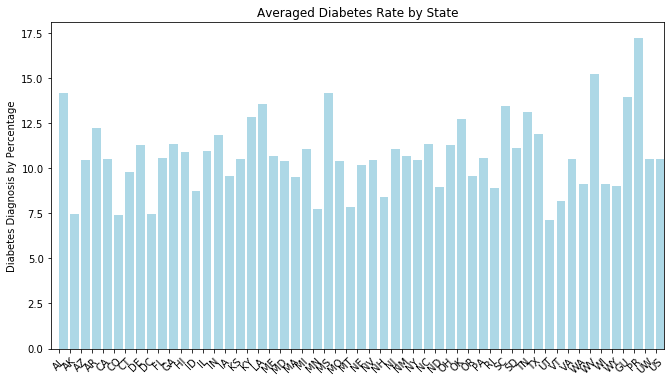

In [23]:
x_value = np.arange(len(states))
plt.figure(figsize=(11,6))
plt.bar(x_value, diab_rate, color='lightblue', align='edge')
tick_locations = [value for value in x_value]
plt.xticks(tick_locations, states)
plt.xlim(-0.75, len(x_value)-0.25) 
plt.xticks(rotation=45)
plt.title('Averaged Diabetes Rate by State')
plt.ylabel('Diabetes Diagnosis by Percentage')
